# Cosmology Ex 2 Week 8

Matter Power Spectrum

In [1]:
# import modules:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate as integrate
import camb

# Evolution of the Matter Power Spectrum $P(k)$

The **matter power spectrum** $P(k)$ describes the amplitude of density fluctuations as a function of comoving wavenumber $k$. Its evolution depends on the cosmological epoch and the physical scale.

---

## 1. Super-Horizon Scales ($k \ll aH$)

- Fluctuations are **outside the horizon** and remain roughly **constant in amplitude**.  
- The spectrum retains the **inflationary initial conditions**.

---

## 2. Radiation-Dominated Era ($a \ll a_{\rm eq}$)

- Modes entering the horizon during radiation domination **cannot grow efficiently** because radiation pressure resists collapse.
- **Sub-horizon matter perturbations** grow only **logarithmically**:  
$ \delta_m \propto \ln a $   
- Small-scale perturbations ($k > k_{\rm eq}$) are **suppressed** relative to large scales.  
- The spectrum shows a **turnover** near the horizon scale at matter-radiation equality ($k_{\rm eq}$).

---

## 3. Matter-Dominated Era ($a \gg a_{\rm eq}$)

- Pressureless matter allows **linear growth of perturbations**:  
$ \delta_m \propto a $  
- The matter power spectrum scales as:  
$ P(k, a) \propto D^2(a) P_{\rm prim}(k) $  
where $D(a)$ is the **linear growth factor**.

---

## 4. Dark Energy / Λ-Dominated Era ($z \lesssim 1$)

- Accelerated expansion **slows the growth of perturbations**.  
- The growth factor flattens, and large-scale structure formation effectively freezes.  
- $P(k)$ stops growing significantly on most scales.

---

### Summary

| Epoch | Behavior of $P(k)$ |
|-------|-------------------|
| Super-horizon | Fluctuations frozen |
| Radiation domination | Suppression of small-scale power |
| Matter domination | Linear growth $ \delta \propto a $ |
| Λ domination | Growth slows, structure freezes |


In [2]:
# define parameters:
Omegam = 0.3
OmegaL = 1 - Omegam

In [3]:
z=np.array([0.,0.8,10,100,1000])

# set parameters to match our cosmological model:
pars = camb.CAMBparams();
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122);
pars.InitPower.set_params(ns=0.965);
pars.set_matter_power(redshifts=z,kmax=200.0);

Note: redshifts have been re-sorted (earliest first)


In [4]:
#Linear spectra
pars.NonLinear = camb.model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 200)

In the next cell, we are visualizing the matter power spectrum $P(k)$ as a function of the wavenumber $k$ using data calculated with CAMB.

The main curve ("linear power spectrum") shows the linear matter power spectrum.

Two reference curves are also overlaid:
- One proportional to $k$, representing the expected behavior on large scales (small $k$) where growth is linear.
- One proportional to $k^{-3} \log^2(k/k_{eq})$, which describes the theoretical trend on small scales (large $k$) after matter-radiation equality.

The scaling constants are chosen so that the reference curves match the power spectrum in their respective regimes.

This comparison highlights how the power spectrum behaves with respect to theoretical expectations in different $k$ regimes.

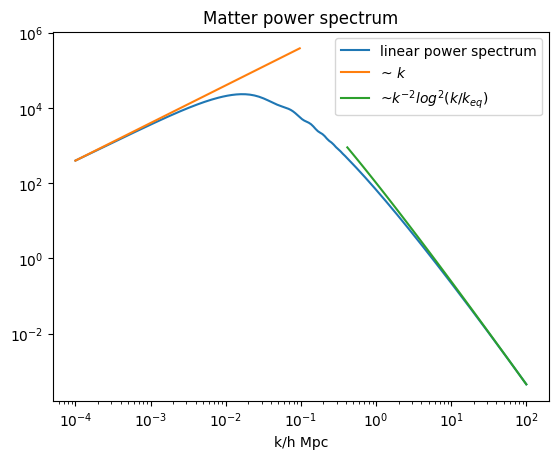

In [5]:
plt.loglog(kh, pk[0,:], label='linear power spectrum');
plt.xlabel('k/h Mpc');
plt.title('Matter power spectrum')

a=pk[0,0]/kh[0]                               ##scaling
plt.plot(kh[0:100],kh[0:100]*a, label='~ $k$')
v=1.1*kh**(-3)*np.log(kh/0.015)**2
b=pk[0,-1]/v[-1]                              ##scaling
plt.plot(kh[120:],b*v[120:], label='~$k^{-2}log^2(k/k_{eq})$')

plt.legend();

$P(k)=A(\frac{k}{k_{eq}})^{n_s}$

$\log{P(k)}=\log{A}+n_s\log{k}-n_{s}\log{k_{eq}}$

$n_s=\frac{d\log{P(k)}}{d\log k}$

n_s = 0.9645396295825903


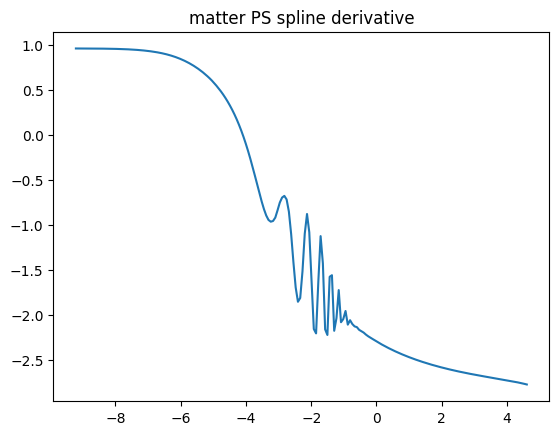

In [8]:
spline = scipy.interpolate.CubicSpline(np.log(kh), np.log(pk[0,:]));
plt.plot(np.log(kh), spline(np.log(kh),1))
plt.title('matter PS spline derivative');

print('n_s =',spline(np.log(kh),1)[0])

In this cell, we use a cubic spline to interpolate the logarithm of the matter power spectrum $\log P(k)$ as a function of $\log k$.
By plotting the derivative of the spline, we visualize how the spectral index $n_s$ varies with scale, since $n_s = \frac{d\log P(k)}{d\log k}$.
The value printed corresponds to the spectral index $n_s$ at the smallest $k$ (largest scale), which is a key parameter describing the initial conditions of the Universe.